In [33]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [34]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]  # 多分类任务
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
eval_set = [(X_train, y_train),
            (X_test, y_test)]
cat = CatBoostClassifier(thread_count=-1, verbose=False, allow_writing_files=False)
cat.fit(X_train, y_train,
        eval_set=eval_set,  # ==>xgboost
        early_stopping_rounds=100)  # ==>xgboost

result = cat.predict(X_test)
result

array([[5],
       [1],
       [4],
       [5],
       [5],
       [2],
       [1],
       [5],
       [2],
       [1],
       [2],
       [1],
       [2],
       [6],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [6],
       [3],
       [7],
       [3],
       [4],
       [5],
       [5],
       [6],
       [6],
       [5],
       [2],
       [5],
       [1],
       [1],
       [5],
       [4],
       [5],
       [6],
       [2],
       [2],
       [1],
       [4],
       [2],
       [6],
       [7],
       [3],
       [5],
       [6],
       [6],
       [1],
       [1],
       [1],
       [6],
       [1],
       [5],
       [5],
       [5],
       [5],
       [1],
       [1],
       [2],
       [5],
       [3],
       [6],
       [2],
       [3],
       [3],
       [5],
       [5],
       [2],
       [5],
       [3],
       [4],
       [1],
       [7],
       [5],
       [5],
       [5],
       [3],
       [3],
       [2],
       [2],
    

In [36]:
# 注意:在xgboost,lightgbm种结果维度为(750,)
result.shape

(750, 1)

In [37]:
# 预测结果可以输出为概率向量
result_pro = cat.predict_proba(X_test) # 仅分类算法
result_pro

array([[7.63879713e-02, 1.25356681e-01, 1.54085132e-05, ...,
        7.97970130e-01, 1.94809862e-05, 2.32743640e-04],
       [9.90479194e-01, 9.19864868e-03, 3.79861432e-06, ...,
        4.56051164e-06, 3.46064483e-06, 3.09236070e-04],
       [6.60652190e-05, 2.98743177e-04, 1.28586379e-01, ...,
        1.51340427e-03, 5.96221816e-03, 2.82001478e-05],
       ...,
       [8.38400164e-02, 9.13118828e-01, 5.02618758e-05, ...,
        2.86282188e-03, 4.87317434e-05, 7.24919527e-05],
       [7.80660235e-01, 2.17614094e-01, 2.12204262e-05, ...,
        1.52448440e-03, 1.54164698e-04, 1.63346472e-05],
       [8.71394864e-01, 1.24902307e-01, 1.47138855e-04, ...,
        2.82177709e-04, 2.87833408e-04, 2.88656480e-03]])

In [38]:
result_pro.shape

(750, 7)

In [39]:
cat.score(X_test, y_test)  # 精度

0.832

In [40]:
cat.feature_importances_  # 特征的相对重要性

array([1.97696535e+01, 4.48990275e+00, 3.30247194e+00, 7.29386099e+00,
       5.51652512e+00, 1.47245263e+01, 5.42467332e+00, 4.59648192e+00,
       3.57978104e+00, 1.34431275e+01, 4.05610882e+00, 0.00000000e+00,
       2.05873869e+00, 6.57052826e+00, 1.50879585e-01, 3.73676021e-02,
       1.95521200e-02, 1.45918189e-02, 3.83576584e-02, 2.28657685e-02,
       0.00000000e+00, 0.00000000e+00, 3.25397512e-03, 3.38559666e-01,
       1.93683939e-02, 7.06549131e-01, 1.29108716e-01, 0.00000000e+00,
       0.00000000e+00, 5.57896432e-02, 1.27584339e-01, 5.62031295e-02,
       1.37977230e-02, 3.73092590e-01, 0.00000000e+00, 2.97063451e-02,
       5.16795159e-01, 9.33600067e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.30394740e+00, 9.42019722e-01,
       1.87030088e-02, 9.22781351e-04, 8.90589164e-02, 1.21797983e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.62113096e-02,
       5.46046014e-02, 1.50810387e-04])

In [48]:
'''

Return the feature importances as a list of the following pairs sorted by feature importance:
(feature_id, feature importance)
'''
cat.get_feature_importance(prettified=True)  # 默认prettified=False

,Feature Id,Importances
0,0,19.769654
1,5,14.724526
2,9,13.443127
3,3,7.293861
4,13,6.570528
5,4,5.516525
6,6,5.424673
7,7,4.596482
8,1,4.489903
9,10,4.056109


In [41]:
evals_result = cat.evals_result_  # 根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result

{'learn': {'MultiClass': [1.7316519272625028,
   1.5807773894624921,
   1.4546669331731796,
   1.3478094280890358,
   1.2662766529708291,
   1.195993851022479,
   1.1378436755892234,
   1.0848933789326336,
   1.0375150364668642,
   0.9951719602588999,
   0.9573397790991411,
   0.9231978406083834,
   0.893599038623404,
   0.8703847524245348,
   0.8456587318017569,
   0.8202963158705803,
   0.8002249052776469,
   0.7789669518628791,
   0.7588353148442555,
   0.7421438117909339,
   0.7296290475947714,
   0.7197764677948788,
   0.7086273500405985,
   0.6953409094628439,
   0.6814847381372291,
   0.6699661976282397,
   0.6599368081850867,
   0.6508745803328897,
   0.6398341476893676,
   0.629714523730844,
   0.6209498981202123,
   0.6127518621748337,
   0.6047986788171419,
   0.598686003886999,
   0.5944756926594025,
   0.5874927239678945,
   0.5833359426839984,
   0.5759015503967262,
   0.5704744917755091,
   0.5650164112881294,
   0.5610897428041194,
   0.557169032229136,
   0.55118877559

In [42]:
# 第一个为训练数据集的评估结果
# 后面(第二个开始)根据fit函数中eval_set参数与eval_metric参数返回评估结果
evals_result.keys()

dict_keys(['learn', 'validation_0', 'validation_1'])

In [43]:
train_evals = evals_result['validation_0']['MultiClass']
test_evals = evals_result['validation_1']['MultiClass']

Text(0.5, 0, 'rounds')

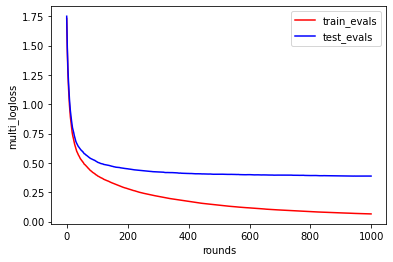

In [44]:
plt.plot(train_evals, label='train_evals', color='red')
plt.plot(test_evals, label='test_evals', color='b')
plt.legend()
plt.ylabel('multi_logloss')
plt.xlabel('rounds')